## Calculo de mu combinando VBF, Monojet y Dijet

In [1]:
import pyhf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil

In [2]:
#Lectura de datos
VBF = pd.read_csv("../mu_for_VBF/VBFData.csv")
MJ = pd.read_csv("../mu_for_monojet/MJData.csv")
DJ = pd.read_csv("../mu_for_Dijet/DJData.csv")

In [3]:
#Definimos nuevo bkg, data y señal
bkg = np.concatenate((VBF["VBF_bkg"], MJ["MJ_bkg"], DJ["DJ_bkg"]), axis=None)
errbkg = np.concatenate((VBF["VBF_errbkg"], MJ["MJ_errbkg"], DJ["DJ_errbkg"]), axis=None)
Data = np.concatenate((VBF["VBF_data"], MJ["MJ_data"], DJ["DJ_data"]), axis=None)
signal = np.concatenate((VBF["VBF_ldecays"], MJ["MJ_higgs"], DJ["DJ_signal"]), axis=None)

In [4]:
#Creamos modelo
model = pyhf.simplemodels.uncorrelated_background(signal = list(signal), bkg = list(bkg), bkg_uncertainty = list(bkg))

In [5]:
#Calculamos el mu observado y esperado
observations = np.concatenate((Data, model.config.auxdata))
poi_values = np.linspace(0.1, 5, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.6f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.6f}")

/home/josue/Desktop/Materia Oscura/venv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Upper limit (obs): μ = 0.100000
Upper limit (exp): μ = 0.100000


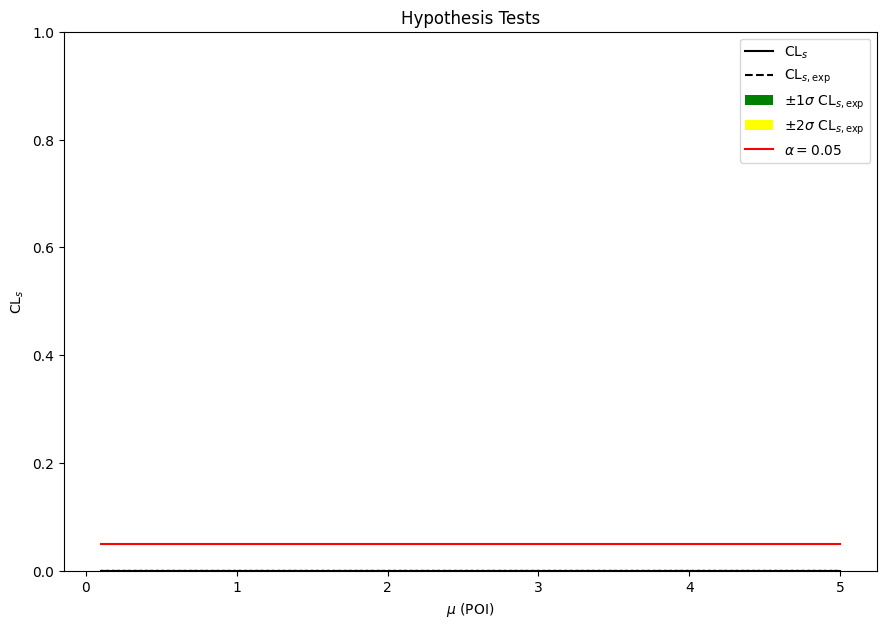

In [6]:
#Grafica de bandera
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)